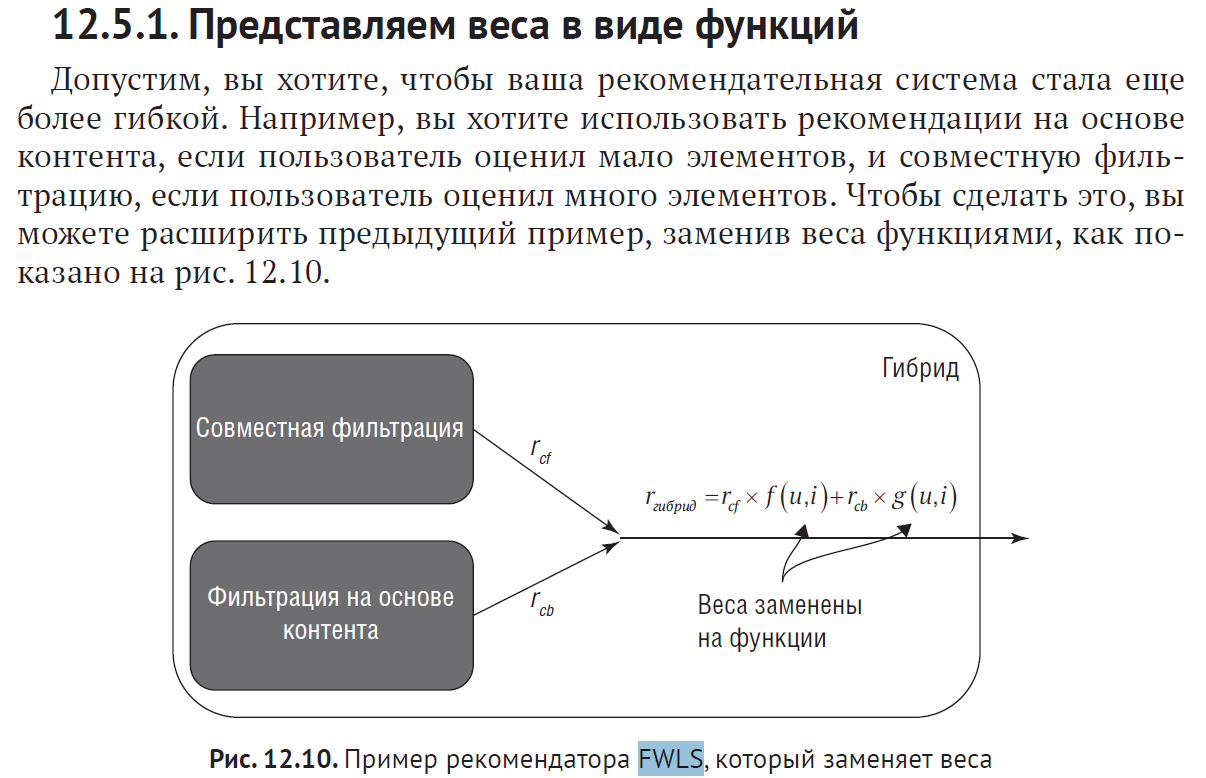

In [15]:
import requests
import time
import pandas as pd
import numpy as np
from decimal import Decimal
from scipy.sparse import coo_matrix
# косинусовое сходство
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [16]:
def get_current_user_ratings():
    columns = ['user_id', 'movie_id', 'rating']
    current_user_ratings = pd.DataFrame([
        ['100',10,4],
         ['100',11,3],
         ['100',14,5],
    ],columns=columns)
    
    return current_user_ratings

def get_recomendations_from_join_filtering_item_item(user_id,number_of_recs=5):
    columns = ['target_id', 'prediction', 'sim_movies']
    recs = pd.DataFrame([
        [12, 4.5, [14]],
        [17, 4.1,[14,10]]
    ],columns=columns)
    
def get_recomendations_from_content_filtering(user_id,number_of_recs=5):
    columns = ['target_id', 'prediction', 'sim_movies']
    recs = pd.DataFrame([
        [17,4.5,[14,10]],
        [12,4.1,[10]]
    ],columns=columns)
    

In [17]:
#получаем оценки от пользователя
current_user_ratings = get_current_user_ratings()

# получаем рекомендации от совместной рекомендации элемент-элемент
join_recs = get_recomendations_from_join_filtering_item_item(current_user_ratings)

# получаем рекомендации от контентной фильтрации
content_recs = get_recomendations_from_content_filtering(current_user_ratings)

In [18]:
def get_users_ratings():
    users_ratings = pd.DataFrame([
    [0,10,5.0],
    [0,11,3.0],
    [0,13,2.0],
    [0,14,2.0],
    [0,15,2.0],
    
    [1,10,4.0],
    [1,11,3.0],
    [1,12,4.0],
    [1,14,3.0],
    [1,15,3.0],
    
     [2,10,5.0],
    [2,11,2.0],
    [2,12,5.0],
     [2,13,2.0],
    [2,14,1.0],
    [2,15,1.0],
    
      [3,10,3.0],
    [3,11,5.0],
    [3,12,3.0],
    [3,14,1.0],
    [3,15,1.0],
    
      [4,10,3.0],
    [4,11,3.0],
    [4,12,3.0],
     [4,13,2.0],
    [4,14,4.0],
    [4,15,5.0],
    
      [5,10,2.0],
    [5,11,3.0],
    [5,12,2.0],
     [5,13,3.0],
    [5,14,5.0],
    [5,15,5.0],
],columns=['user_id','movie_id','rating'])
    
    return users_ratings

In [20]:
# step 1
# получение оценок всех пользователей
all_ratings = get_users_ratings()

# разбиение выборок на тетсовую и обучающую
train_data, test_data = train_test_split(all_ratings, test_size=0.2)


    user_id  movie_id  rating
3         0        14     2.0
12        2        12     5.0
28        5        11     3.0
5         1        10     4.0
25        4        14     4.0
7         1        12     4.0
17        3        11     5.0
32        5        15     5.0
2         0        13     2.0
30        5        13     3.0
11        2        11     2.0
16        3        10     3.0
6         1        11     3.0
27        5        10     2.0
13        2        13     2.0
26        4        15     5.0
4         0        15     2.0
15        2        15     1.0
9         1        15     3.0
29        5        12     2.0
18        3        12     3.0
1         0        11     3.0
20        3        15     1.0
21        4        10     3.0
8         1        14     3.0
19        3        14     1.0


In [ ]:
# step 4
def train(self, ratings=None, train_feature_recs=False):

#     if train_feature_recs:
#         ItemSimilarityMatrixBuilder().build(ratings)
#         LdaModel.build()

    regr = linear_model.LinearRegression(fit_intercept=True,
                                         n_jobs=-1,
                                         normalize=True)

    regr.fit(train_data[['cb1', 'cb2', 'cf1', 'cf2']], train_data['rating'])

    result = {'cb1': regr.coef_[0],
              'cb2': regr.coef_[1],
              'cf1': regr.coef_[2],
              'cf2': regr.coef_[3],
              'intercept': regr.intercept_}

    
    return result

In [ ]:
# step 2
train_data['cb'] = train_data.apply(lambda data: content_based_predict_score(data['user_id'], data['movie_id']))
train_data['jb'] = train_data.apply(lambda data: join_based_predict_score(data['user_id'], data['movie_id']))

In [ ]:
def fun1():
    return 1.0

# Если пользователь оценил менее 3 фильмов вернуть 1 иначе 0
def fun2(user_id,all_ratings):
    user_ratings = all_ratings['user_id']==user_id
    rating_count = all_ratings[user_ratings]['movie_id'].values[0]
    if rating_count < 3.0:
        return 1.0
    return 0.0

In [ ]:
# step 3
def calculate_feature_functions_for_training_data(self):
    train_data['cb1'] = train_data.apply(lambda data:data.cb*self.func1())
    train_data['cb2'] = train_data.apply(lambda data:data.cb*self.func2(data['user_id']))
    train_data['cf1'] = train_data.apply(lambda data:data.cf*self.func1())
    train_data['cf2'] = train_data.apply(lambda data:data.cf*self.func2(data['user_id']))

In [ ]:
def prediction(self, p_cb, p_jb, user_id):
    intercept = 0
    p = (wcb1 * fun1() * p_cb + wcb2 * fun2(user_id) * p_cb +
    wcf1 * fun1() * p_jb +wcf2 * fun2(user_id) * p_jb)
    return p + intercept

In [ ]:
# step 6
def recommend_items(self, user_id, num=6):
    cb_recs = get_recomendations_from_content_filtering(user_id, num * 5)
    jb_recs = get_recomendations_from_join_filtering_item_item(user_id, num * 5)
    combined_recs = dict()
    
    for rec in cb_recs:
        movie_id = rec[0]
        pred = rec[1]['prediction']
        combined_recs[movie_id] = {'cb': pred}
    for rec in cf_recs:
        movie_id = rec[0]
        pred = rec[1]['prediction']
        if movie_id in combined_recs.keys():
            combined_recs[movie_id]['cf'] = pred
        else:
            combined_recs[movie_id] = {'cf': pred}
    
    fwls_preds = dict()
    for key, recs in combined_recs.items():
        if 'cb' not in recs.keys():
            recs['cb'] = content_based_predict_score(user_id, key)
        if 'cf' not in recs.keys():
            recs['cf'] = join_based_predict_score(user_id, key)
        pred = prediction(recs['cb'], recs['cf'], user_id)
        fwls_preds[key] = {'prediction': pred}
    sorted_items = sorted(fwls_preds.items(),
    key=lambda item: -float(item[1]['prediction']))[:num]
    return sorted_items